In [2]:
W 
 Bimport pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\yashs\AppData\Local\Temp\ipykernel_2428\3381811058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv("supermarket_sales.csv")

In [4]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [7]:
df.shape

(1000, 17)

In [8]:
df.dtypes


Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [9]:
# Define a function to detect outliers using IQR method
def detect_outliers_iqr(data):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (data < lower_bound) | (data > upper_bound)
    
    return outliers

# Detect outliers in the 'Total' column
outliers_total = detect_outliers_iqr(df['Total'])

# Display the outliers
print("Outliers in Total Sales:")
print(df[outliers_total])

Outliers in Total Sales:
      Invoice ID Branch       City Customer type  Gender         Product line  \
166  234-65-2137      C  Naypyitaw        Normal    Male   Home and lifestyle   
167  687-47-8271      A     Yangon        Normal    Male  Fashion accessories   
350  860-79-0874      C  Naypyitaw        Member  Female  Fashion accessories   
357  554-42-2417      C  Naypyitaw        Normal  Female    Sports and travel   
422  271-88-8734      C  Naypyitaw        Member  Female  Fashion accessories   
557  283-26-5248      C  Naypyitaw        Member  Female   Food and beverages   
699  751-41-9720      C  Naypyitaw        Normal    Male   Home and lifestyle   
792  744-16-7898      B   Mandalay        Normal  Female   Home and lifestyle   
996  303-96-2227      B   Mandalay        Normal  Female   Home and lifestyle   

     Unit price  Quantity  Tax 5%     Total       Date   Time      Payment  \
166       95.58        10  47.790  1003.590  1/16/2019  13:32         Cash   
167     

# Detecting and removing the outlier from Total column

In [24]:
def remove_outlier(data):
    # Removing outlier by IQR method
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    #Finding the IQR 
    IQR = Q3 - Q1
    # 
    lower_bound = Q1 - IQR * (1.5)
    upper_bound = Q3 + IQR * (1.5)
    print("lower_bound : ", lower_bound, "upper_bound : ",upper_bound)
    
    # Identifying outlier
    Outliers = data[ (data < lower_bound) | (data > upper_bound)]

    print("The outliers are",Outliers)
    # removing outliers
    data = data[ (data > lower_bound) & (data < upper_bound)]

    return data

<Axes: xlabel='Total', ylabel='Count'>

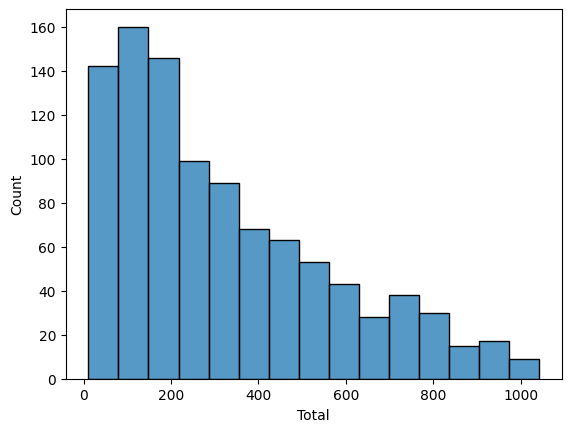

In [25]:
sns.histplot(df['Total'])

<Axes: xlabel='Total'>

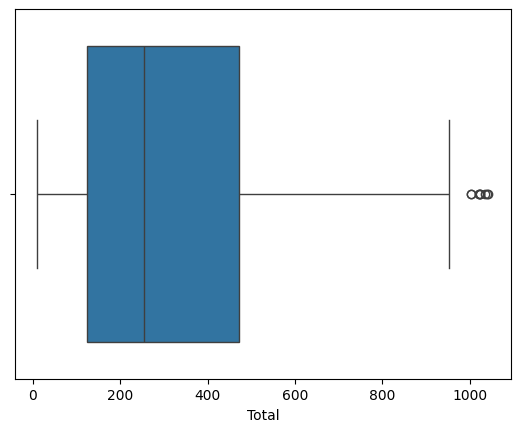

In [26]:
sns.boxplot(x = df['Total'])

In [27]:
removed_Total_outlier = remove_outlier(df['Total'])

lower_bound :  -395.9694375 upper_bound :  991.7420625
The outliers are 166    1003.590
167    1039.290
350    1042.650
357    1002.120
422    1020.705
557    1034.460
699    1023.750
792    1022.385
996    1022.490
Name: Total, dtype: float64


<Axes: xlabel='Total', ylabel='Count'>

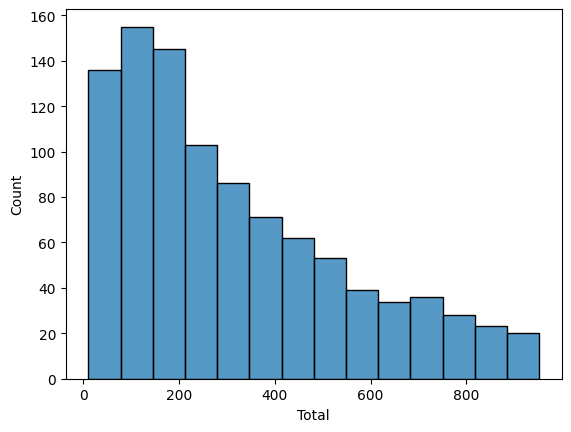

In [28]:
sns.histplot(removed_Total_outlier)

<Axes: xlabel='Total'>

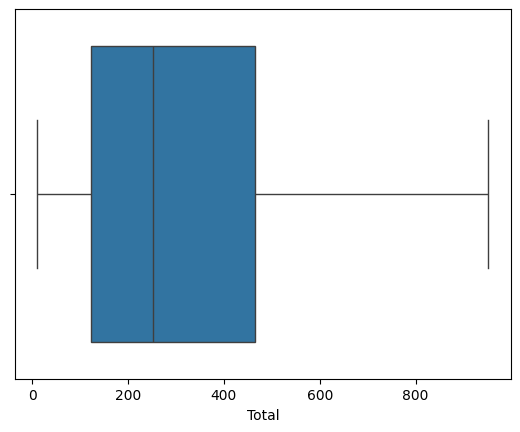

In [29]:
sns.boxplot(x = removed_Total_outlier)